<h1> Iris Classification Machine Learning Project </h1><br>
In this project, I will use the "famous" (according to the scikit-learn folks) iris data set of Sir R.A. Fisher to classify irises based on sepal and petal length and width. This is of course one of the toy data sets which can be found in the scikit-learn datasets package, and is being used to practice implementing a Support Vector Machine (SVM) classification algorithm. I expect that such a machine learning algorithm will yield fairly accurate predictions of iris classifications.

The iris data set found in scikit-learn is a fairly simple data set; it contains four columns consisting of sepal length measurements, sepal width measurements, petal length measurements, and petal width measurements, as well as classifications for each flower whose petals were measured. From the data set description, we see that a total of 150 iris flowers had their sepals and petals measured, 50 from each of three iris species. To give some additional context to the data, we should probably have a basic understanding of what sepals and petals are. According to https://biologydictionary.net/sepal/, sepals are the leaf-shaped structures found on the outermost part of a flower. They are the first part of a flower to develop and provide support and protection for a flower bud. In the particular case of the iris species which appear in this data set, the sepals are not only present once the flower has bloomed, but they are also colorful and attractive to the eye. On the other hand, according to https://www.britannica.com/science/petal, petals are flower parts which serve to attract pollinators to flowers. In these particular iris species, the flower petals are indeed colorful, but lack some of the markings of the sepals. The relative sizes of an iris's sepals and petals seem to be associated with its species classification, at least for these three particular iris species. 

Before we delve into the machine learning model, let's give some credit to the folks who compiled the data set I'm about to use and to the scikit-learn folks who made it available through their open-source software package.<br>
Let's start with a citation to the Scikit-Learn folks: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011<br>
and, of course, their main website: https://scikit-learn.org/stable/index.html.<br>
As documented on https://scikit-learn.org/stable/datasets/index.html, the iris data used in this project comes from Sir Fisher's paper; it is the same as the data set found in R, and fixes two wrong data points in the UCI Machine Learning Repository version of the data set. 

<h1> Importing Packages and the Data </h1><br>
To begin, we'll need to import data analysis packages and of course the data itself.

In [1]:
# First import the data from scikit-learn:
from sklearn.datasets import load_iris

# Then import data analysis packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [2]:
# Now to retrieve the data "bunch" from load_iris:
iris_data = load_iris(as_frame = True)  

In [3]:
#print(iris_data.DESCR)
# I printed out the file description to see what the various columns corresponded to, and what the targets are. 
# I've commented this call to print() out so as not to clog the output cell. 
# From the description, the target names are: 'setosa', 'versicolor', 'virginica'. I assume that these correspond to
# targets 0, 1, and 2, respectively.

# With that in mind, let's import the features:
all_features = iris_data.data
pd.DataFrame(all_features)
#print(all_features.info())

# And then import the targets:
targets = iris_data.target
#pd.DataFrame(targets)

<h1> Building the SVM Model </h1> <br>
The scikit-learn documentation says that this iris data set is one of the best known data sets in pattern recognition literature, in part because one iris species is linearly separable from the other two, but those two are not linearly separable from each other. This makes the data set ideal for something like K-Means clustering (indeed, Codecademy uses this data set to illusratate how this unsupervised machine learning method works), but will also probably work for a Support Vector Machine model with an RBF kernel. 

Since this is a project designed to practice supervised machine learning methods, I will first try to fit an SVM model to the iris data. I will treat the regularization parameter C and kernel coefficient gamma as free parameters, to be determined by which pair results in the largest accuracy when the C/gamma parameter space is explored, and the model is applied to the validation data subset. 

In [4]:
# According to https://scikit-learn.org/stable/modules/preprocessing.html, the RBF kernel of scikit-learn's SVC method
# assumes that features are centered on zero and have variance in the same order. That means I'd better scale the
# features in the iris data set. I'll go ahead and scale now, so that when I pluck off a validation/test data set 
# from the training set, everything has already been scaled.

all_features = scale(all_features, axis=0)


# Now that we've scaled the data, we can split it into training, validation, and test sets:
train_frac = 0.70 
valid_frac = 0.15
test_frac = 0.15
adj_valid_frac = valid_frac / (1 - test_frac)

feat_nottest_all, feat_test_all, class_nottest_all, class_test_all =  \
      train_test_split(all_features, targets, test_size = test_frac, random_state = 62)

feat_train_all, feat_valid_all, class_train_all, class_valid_all =  \
      train_test_split(feat_nottest_all, class_nottest_all, test_size = adj_valid_frac, random_state = 62)


# Now to build the SVM model. I will use scikit-learn's SVC method to accomplish this. As I mentioned above, 
# I will be treating C and gamma as free parameters to be optimized, with the optimization criterion being the
# combination of C and gamma which yields the highest accuracy. First let's initialize some arrays to keep track
# of which Cs and gammas we've tried, and what the resulting accuracy score was:

scores = []
gees = []
cees = []

# Now loop over a range of gamma and C values. For each gamma/C combination, build an SVM model, train it, determine
# the accuracy by applying the model to the test set, and store the current gamma, C, and accuracy score:

for g in range(1,3):
    for c in range(1,301):
        c = c / 100.0
        classes = SVC(kernel = 'rbf', gamma = g, C = c, random_state = 61)
        classes.fit(feat_train_all, class_train_all)
        scores.append(classes.score(feat_valid_all, class_valid_all))
        gees.append(g)
        cees.append(c)

In [5]:
# What was the highest accuracy score, and what element is it in the scores index?
print(scores.index(max(scores)), max(scores))

# Print out which gamma and C correspond to this maximum accuracy score:
print(gees[117])
print(cees[117])

117 0.9130434782608695
1
1.18


<h1> Investigating the Performance of the Optimum SVM Model </h1> <br>
Having determined which gamma and C maximize the accuracy of the SVM model, build that particular model and see how it performed.

In [6]:
best_all_classifier = SVC(kernel = 'rbf', gamma = gees[117], C = cees[117])
best_all_classifier.fit(feat_train_all, class_train_all)
best_all_predictions = best_all_classifier.predict(feat_test_all)

In [7]:
'''I got the following idea for investigating the performance of the model from Codecademy's K-Means lesson. 
Instead of doing what I did in other projects -- which was essentially loop through the predictions, see if they
matched the actual labels/classifications, and merely report successful/unsuccessful -- let's build a cross-
tabulation table to see what each iris in the test set was classified as by the SVM model, and whether or not
that classification was right. I expect, given a model accuracy of 96.7%, to see very few misclassifications.
The cross-tabulation table code I write below is based pretty heavily off the Codecademy K-Means lesson 
implementation, so shout-outs and credit to the Codecademy folks.'''

# First, let's build an array designed to hold strings that will collect the actual classification of an iris
# in the test set; that is to say, if an iris in the test set has a target value of 0, what species classification
# does that correspond to, etc. 
classifications = np.chararray(class_test_all.shape, itemsize=len(class_test_all), unicode = True)
#print(class_test_all.value_counts())

# Now, for all irises in the test set, get the species classification that matches its target number:
for j in range(len(class_test_all)):
    if class_test_all.iloc[j] == 0:
        classifications[j] = 'setosa'
    elif class_test_all.iloc[j] == 1:
        classifications[j] = 'versicolor'
    elif class_test_all.iloc[j] == 2: 
        classifications[j] = 'virginica'
        
# Build a data frame which contains the predicted classifications of the test set and the actual classifications:
predictactual = pd.DataFrame({'predictions': best_all_predictions, 'classifications': classifications})

# Finally, build the cross-tabulation table to see how many irises were predicted to be setosas, versicolors, 
# and virginicas, and what the actual classification was:
crosstabtable = pd.crosstab(predictactual['predictions'],predictactual['classifications'])
print(crosstabtable)

classifications  setosa  versicolor  virginica
predictions                                   
0                     9           0          0
1                     0           6          0
2                     0           1          7


As suspected, there is only one misclassification: an iris which is actually a "versicolor" iris was misclassified by the SVM model as a "virginica" iris (class 2). However, all "setosa" irises (class 0) were classified correctly, as were all "virginica" irises (class 2). This matches what the documentation indicated: one class of iris ("setosa") is linearly separable from the other two ("versicolor" and "virginica"), but the other two are not linearly separable from each other. All in all, the SVM model has performed well, and has done what was expected; namely, it correctly separated all the "setosas" from the other two iris classifications, but had a harder time separating the "versicolor" and "virginica" species.

The cross-tabulation table is great and all, and provides a pretty good summary of how the model ended up doing, but it would be great to see a visual representation of this too. Here's what I came up with below. I'm not about to argue that it's the <i>best</i> visualization of the model performance, but it is a visualization nonetheless, and I think an informative one. Here's what I did. For convenience sake, let's assign an "ID" to each iris in the test set which just corresponds to the index in the test set array it corresponds to. So the first iris would have "ID" zero, the second one "ID" one, and so forth. For each iris "ID", plot its true classification in red and the model predicted classification in blue. If the true and model classifications line up, the corresponding dot on the below plot will be purple. Otherwise, we will see separate red and blue dots where the model failed to get the classification right.

Text(0.5, 1.0, 'Actual Iris Classification Compared to Model Classification')

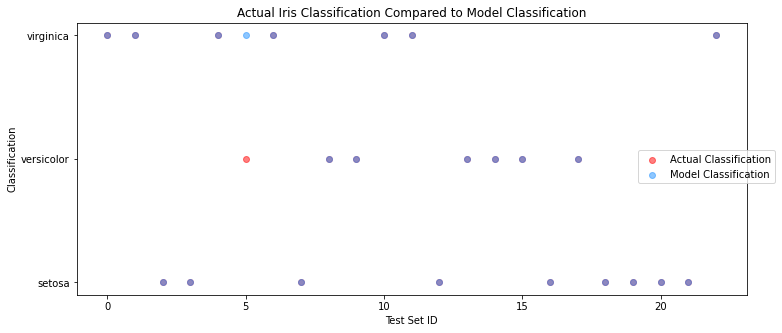

In [8]:
x_axis = range(len(class_test_all))

plt.figure(figsize=(12,5))
ax = plt.subplot()
plt.scatter(x_axis, class_test_all, color = 'red', alpha = 0.5)
plt.scatter(x_axis, best_all_predictions, color = 'dodgerblue', alpha = 0.5)
ax.set_yticks([0,1,2])
ax.set_yticklabels(['setosa','versicolor','virginica'])
plt.legend(['Actual Classification', 'Model Classification'], bbox_to_anchor=(1.05, 0.55))
plt.xlabel('Test Set ID')
plt.ylabel('Classification')
plt.title('Actual Iris Classification Compared to Model Classification')

What I like about the above visualization is that we can see precisely which iris was misclassified, and what its true classification was. In some sense, this is the same information that we got from the cross-tabulation table, but with the added benefit that we can see which precise iris was misclassified rather than just that one was. If we wanted to, we could then go to that iris to see what made it so hard to classify, if we were so inclined. But at the very least, this plot offers similar information to the cross-tabulation table but in more visual, colourful format.

<h1> Conclusions </h1> <br>
We have implemented a Support Vector Machine classification algorithm to build a machine learning model that would allow us to classify irises in the scikit-learn iris toy data set. This model proved to be very accurate, misclassifying only 1 iris out of 23. By constructing a cross-tabulation table -- and also plotting the predicted versus actual classifications -- we were able to see that the model behaved as expected from the scikit-learn documentation: that is to say, it successfully separated one iris species from the other two, but had a harder time classifying irises of those two species. All in all, for this particular data set, I conclude that an SVM algorithm does an excellent job in predicting iris species classification. Of course, it is possible to implement other machine learning algorithms to classify this data set, but the algorithm explored here provides more than adequate accuracy.